In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression   

import statsmodels.formula.api as smf               

import pandas_profiling

In [10]:
#import the data
CC_data = pd.read_excel('Data Set.xlsx')

In [11]:
CC_data.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0


In [12]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [13]:
CC_data['ccspend'] = CC_data['cardspent'] + CC_data['card2spent']
CC_data.drop(['cardspent','card2spent'],axis=1,inplace =True)

In [14]:
CC_data.shape

(5000, 129)

In [15]:
profile_report = pandas_profiling.ProfileReport(CC_data)

In [16]:
profile_report.to_file('profile_report.html')

In [17]:
#some data types need data type conversions  - done
#Renaming columns is required  -No_need
# missings are existed-Yes
#Need to derive some columns - done
#Any variables with more zeros (why?)
#Any variables with highly correlated - done
#any variables with low variation-done
#any variables with outliers-done
#any special characters in the data - no-need
#list of categorical variable required to convert into numeric (encoding)-done


In [18]:
# Creating Categorical List= Contains categorical variables...

for x in ['region','townsize','gender','agecat','edcat','birthmonth','jobcat','union','employ','empcat','retire',
          'inccat','default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown',
          'cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenure','cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
        'news','response_01','response_02','response_03']:
    CC_data[x]=CC_data[x].astype('object')

In [19]:
# Find numerical variable in Data frame.
# This will return a list
numeric_var_names = [key for key in dict(CC_data.dtypes) if dict(CC_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_names = [key for key in dict(CC_data.dtypes) if dict(CC_data.dtypes)[key] in ['object','O']]

#Print the data frame
print( numeric_var_names)
print(cat_var_names)


['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'ccspend']
['custid', 'region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor',

In [20]:
#Convert numeric-variable in to the CC_data_df_num
CC_data_df_num=CC_data[numeric_var_names]
CC_data_df_num.head(5)

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,ccspend
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [21]:
#Convert catagorical-variable in to the CC_data_df_cat
CC_data_df_cat=CC_data[cat_var_names]
CC_data_df_cat.head(5)

,custid,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,2,September,3,1,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,2,May,4,2,0,0,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,6,June,2,2,0,16,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,2,May,3,2,0,0,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,3,July,3,2,0,1,...,1,0,1,0,1,0,0,0,1,0


In [22]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=CC_data_df_num.apply(lambda x: var_summary(x))

In [23]:
num_summary

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,ccspend
N,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,...,5000.000000,3581.000000,4.998000e+03,3578.000000,5000.000000,1344.000000,5.000000e+03,1344.000000,5000.000000,5.000000e+03
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1419.000000,2.000000e+00,1422.000000,0.000000,3656.000000,0.000000e+00,3656.000000,0.000000,0.000000e+00
SUM,235128.000000,72715.000000,273798.000000,18499.546992,49770.800000,9286.628229,-652.137155,18272.300771,3483.879384,30564.000000,...,77219.250000,10419.752778,3.600951e+06,22993.332638,53505.950000,4845.120915,2.109923e+06,9150.129457,98225.000000,2.490393e+06
MEAN,47.025600,14.543000,54.759600,3.699909,9.954160,1.857326,-0.130454,3.654460,0.696915,6.112800,...,15.443850,2.909733,7.204784e+02,6.426309,10.701190,3.605001,4.219846e+02,6.808132,19.645000,4.980786e+02
MEDIAN,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,...,13.750000,2.904165,4.250000e+02,6.639876,0.000000,3.597997,0.000000e+00,7.147185,20.000000,4.142500e+02
STD,17.770338,3.281083,55.377511,0.747072,6.399783,3.415732,1.273058,5.395172,1.128578,7.743518,...,15.007569,0.564859,9.222255e+02,1.172050,19.799837,0.390102,1.001003e+03,1.283967,5.165609,3.515293e+02
VAR,315.784902,10.765504,3066.668742,0.558116,40.957226,11.667225,1.620678,29.107876,1.273689,59.962069,...,225.227130,0.319066,8.504999e+05,1.373700,392.033527,0.152179,1.002008e+06,1.648571,26.683512,1.235728e+05
MIN,18.000000,6.000000,9.000000,2.197225,0.000000,0.000000,-6.597334,0.000000,-4.092107,-1.000000,...,0.000000,1.178655,0.000000e+00,1.558145,0.000000,2.541602,0.000000e+00,2.541602,0.000000,8.110000e+00
P1,18.000000,8.000000,9.000000,2.197225,0.700000,0.033160,-3.401690,0.114299,-2.168241,-1.000000,...,0.000000,1.658228,0.000000e+00,2.484907,0.000000,2.806811,0.000000e+00,3.039749,0.000000,5.819760e+01
P5,20.000000,9.000000,13.000000,2.564949,1.900000,0.101088,-2.291604,0.287692,-1.243483,-1.000000,...,0.000000,1.981001,0.000000e+00,4.094345,0.000000,2.992964,0.000000e+00,4.114134,12.000000,1.331060e+02


In [24]:
# get the %age of missing values in the data
M_vales=(1 - CC_data_df_num.count()/CC_data_df_num.shape[0])*100
M_vales=pd.DataFrame(M_vales)
M_vales.sort_values([0],ascending=(False)).head(10)

,0
lnwireten,73.12
lnwiremon,73.12
lnequipmon,65.92
lnequipten,65.92
lntollmon,52.44
lntollten,52.44
lncardten,28.44
lncardmon,28.38
longten,0.06
lnlongten,0.06


In [25]:
# Create Data audit Report for categorical variables
def cat_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2),x.value_counts(),x.unique()], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT','ColumnNames','UniqueValues'])
cat_summary=CC_data_df_cat.apply(lambda x:cat_summary(x))


In [26]:
cat_summary

,custid,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
N,5000,5000,4998,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
NMISS,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MODE,1227-UVXTFQ-LIH,5,1,1,4,September,2,2,0,0,...,1,0,1,0,0,0,0,0,0,0
FREQ,1,1027,1436,2518,1222,458,1567,1640,4244,659,...,4664,3995,3164,2604,2626,4106,2637,4582,4351,4487
PERCENT,0.02,20.54,28.73,50.36,24.44,9.16,31.34,32.8,84.88,13.18,...,93.28,79.9,63.28,52.08,52.52,82.12,52.74,91.64,87.02,89.74
ColumnNames,3557-SBVNER-SYE 1 2067-LYKEFN-EEO 1 9906...,5 1027 1 1009 3 1003 2 995 4 ...,1.0 1436 2.0 1048 3.0 907 4.0 85...,"1 2518 0 2482 Name: gender, dtype: int64",4 1222 5 1195 6 1068 3 893 2 ...,September 458 May 451 June ...,2 1567 4 1111 3 1022 1 946 5 ...,2 1640 1 1388 6 688 3 620 5 ...,"0 4244 1 756 Name: union, dtype: int64",0 659 1 389 2 318 3 309 4 ...,...,"1 4664 0 336 Name: owncd, dtype: int64","0 3995 1 1005 Name: ownpda, dtype: int64","1 3164 0 1836 Name: ownpc, dtype: int64","0 2604 1 2396 Name: ownipod, dtype: int64","0 2626 1 2374 Name: owngame, dtype: int64","0 4106 1 894 Name: ownfax, dtype: int64","0 2637 1 2363 Name: news, dtype: int64","0 4582 1 418 Name: response_01, dtype: ...","0 4351 1 649 Name: response_02, dtype: ...","0 4487 1 513 Name: response_03, dtype: ..."
UniqueValues,"[3964-QJWTRG-NPN, 0648-AIPJSP-UVM, 5195-TLUDJE...","[1, 5, 3, 4, 2]","[2.0, 5.0, 4.0, 3.0, 1.0, nan]","[1, 0]","[2, 6, 3, 5, 4]","[September, May, June, July, August, October, ...","[3, 4, 2, 1, 5]","[1, 2, 3, 6, 4, 5]","[1, 0]","[0, 16, 1, 22, 10, 11, 15, 19, 8, 4, 12, 3, 27...",...,"[0, 1]","[0, 1]","[0, 1]","[1, 0]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]"


In [27]:
# get the %age of missing values in the Categorical data
M_vales_C=(1 - CC_data_df_cat.count()/CC_data_df_cat.shape[0])*100
M_vales_C=pd.DataFrame(M_vales_C)
M_vales_C.sort_values([0],ascending=(False)).head(2)

,0
townsize,0.04
custid,0.00


### By the help of pandas profiling:-

In [28]:
#if X is having lots of missings (missing pct >25%), then you can ignore this variable
#if X is categorical & nominal, having many categories (>20), ignored these variables in the beginning
CC_data_df_num.drop(columns=['lnwiremon','lnwireten','lnequipten','lnequipmon','lntollten','lntollmon','lncardten','lncardmon'],inplace=True)
CC_data_df_cat.drop(columns=['employ','address','cardtenure','card2tenure','birthmonth'],inplace=True)

In [29]:
#Dropping beased on the business knowledge
CC_data_df_num.drop(columns=['age','ed','income','pets_cats','pets_dogs','pets_birds','pets_reptiles','pets_small','pets_saltfish','pets_freshfish','carvalue','lnlongmon','lnlongten','tollmon','tollten'],inplace=True)
CC_data_df_cat.drop(columns=['custid','homeown','addresscat','cartype','carbought','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','polview','polparty','polcontrib','vote','tollfree','multline','voice','pager','callid','callwait','forward','confer','ownvcr','owndvd','owncd','ownpda','ownipod','ownfax'],inplace=True)


In [30]:
CC_data_df_cat.head(2)

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,...,wireless,internet,ebill,owntv,ownpc,owngame,news,response_01,response_02,response_03
0,1,2,1,2,3,1,1,1,0,2,...,0,0,0,1,0,1,0,0,1,0
1,5,5,0,2,4,2,0,1,0,1,...,1,4,1,1,1,1,1,0,0,0


In [31]:
CC_data_df_num.head(2)

,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,commutetime,...,longmon,longten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,ccspend
0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,22.0,...,6.5,34.4,29.50,126.1,14.25,60.0,0.00,0.00,13,149.46
1,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,29.0,...,8.9,330.6,54.85,1975.0,16.00,610.0,45.65,1683.55,18,77.54


### Outliers treatment

In [32]:
# continuous variables
CC_data_df_num = CC_data_df_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [33]:
CC_data_df_num.apply(var_summary).round(1)

,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,commutetime,...,longmon,longten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,ccspend
N,5000.0,5000.0,5000.0,4999.0,5000.0,4999.0,5000.0,5000.0,5000.0,4998.0,...,5000.0,4997.0,5000.0,5000.0,5000.0,4998.0,5000.0,5000.0,5000.0,5000.0
NMISS,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
SUM,18485.2,49570.6,8791.8,-638.8,17612.5,3491.2,30477.0,10971.0,15246.0,126610.5,...,66363.2,3469528.9,64543.6,2316992.0,76334.8,3534781.0,52651.4,2049800.1,98133.0,2467176.4
MEAN,3.7,9.9,1.8,-0.1,3.5,0.7,6.1,2.2,3.0,25.3,...,13.3,694.3,12.9,463.4,15.3,707.2,10.5,410.0,19.6,493.4
MEDIAN,3.6,8.8,0.9,-0.1,2.1,0.7,-1.0,2.0,2.0,25.0,...,9.6,350.0,0.0,0.0,13.8,425.0,0.0,0.0,20.0,414.2
STD,0.7,6.2,2.4,1.2,4.2,1.1,7.7,1.4,3.4,5.8,...,11.6,893.0,19.0,882.8,14.2,848.3,19.0,930.0,5.1,322.8
VAR,0.5,39.0,5.7,1.5,17.8,1.2,59.4,1.9,11.2,33.1,...,133.4,797373.7,359.3,779393.8,200.4,719680.6,361.8,864913.8,26.2,104196.8
MIN,2.2,0.7,0.0,-3.4,0.1,-2.2,-1.0,1.0,0.0,13.0,...,1.8,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.2
P1,2.2,0.7,0.0,-3.4,0.1,-2.2,-1.0,1.0,0.0,13.0,...,1.8,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.2
P5,2.6,1.9,0.1,-2.3,0.3,-1.2,-1.0,1.0,0.0,16.0,...,2.9,12.6,0.0,0.0,0.0,0.0,0.0,0.0,12.0,133.1


### Missing value imputations

In [34]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    
    return x

In [35]:
#for continuous variables
CC_data_df_num = CC_data_df_num.apply(missing_imputation)

In [36]:
num_summary=CC_data_df_num.apply(lambda x: var_summary(x))

In [37]:
num_summary.T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
lninc,5000.0,0.0,1.848525e+04,3.697049,3.637586,0.738495,0.545375,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605802,5.605839
debtinc,5000.0,0.0,4.957060e+04,9.914120,8.800000,6.241691,38.958700,0.700000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,29.200000
creddebt,5000.0,0.0,8.791845e+03,1.758369,0.926437,2.380681,5.667644,0.033160,0.033166,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280004,14.280358
lncreddebt,5000.0,0.0,-6.388983e+02,-0.127780,-0.076409,1.241273,1.540760,-3.401690,-3.401598,-2.291595,-1.737699,-0.952498,-0.076409,0.724559,1.458492,1.852071,2.658860,2.658910
othdebt,5000.0,0.0,1.761253e+04,3.522506,2.098540,4.221760,17.823256,0.114299,0.114312,0.287692,0.457997,0.980301,2.098540,4.314780,8.062046,11.815981,24.062466,24.064260
lnothdebt,5000.0,0.0,3.491931e+03,0.698386,0.741242,1.104420,1.219743,-2.168241,-2.168229,-1.243358,-0.780244,-0.018535,0.741242,1.462046,2.087167,2.469453,3.180654,3.180802
spoused,5000.0,0.0,3.047700e+04,6.095400,-1.000000,7.709565,59.437386,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,20.000000
reside,5000.0,0.0,1.097100e+04,2.194200,2.000000,1.361491,1.853657,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000
pets,5000.0,0.0,1.524600e+04,3.049200,2.000000,3.351213,11.230625,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,8.000000,10.000000,13.000000,13.000000
commutetime,5000.0,0.0,1.266612e+05,25.332233,25.000000,5.754711,33.116698,13.000000,13.000000,16.000000,18.000000,21.000000,25.000000,29.000000,33.000000,35.000000,40.000300,40.030000


In [38]:
#Handling missings - Method2
def Missing_imputation_C(x):
    x = x.fillna(x.median())
    return x

CC_data_df_cat=CC_data_df_cat.apply(lambda x: Missing_imputation_C(x))

In [39]:
CC_data_df_num.shape

(5000, 21)

In [40]:
CC_data_df_cat.shape

(5000, 47)

In [41]:
# Creating Dummy variable for Catagorical Variables and droping its original Variables.
#.........
# Dummy Creation is done on only these variables because remaning variables are already in dummy form..

cat_to_dum=['region','townsize','gender','agecat','edcat','empcat','inccat','jobsat','spousedcat',
         'hometype','addresscat','cars','carown','cartype','carcatvalue',
         'carbought','commutecat','reason','polview','card','cardtype','cardbenefit',
         'cardtenurecat','card2','card2type','card2benefit','card2tenurecat',
         'bfast','internet']

CC_data_df_cat['townsize']=CC_data_df_cat['townsize'].astype(int)
dum_var=[] #list of  newly created dummy variables.. 
for var in cat_to_dum:
    if var in CC_data_df_cat:
        col_dummies = pd.get_dummies(CC_data_df_cat[var], prefix=var+'_dummy',drop_first=True)
        CC_data_df_cat=pd.concat([CC_data_df_cat,col_dummies],axis=1)
        CC_data_df_cat.drop(var,axis=1,inplace=True)

In [42]:
CC_data_df_cat.shape

(5000, 114)

In [43]:
CC_data_df_cat.columns

Index(['jobcat', 'union', 'retire', 'default', 'marital', 'carbuy', 'commute',
       'cardfee', 'card2fee', 'active',
       ...
       'card2tenurecat_dummy_2', 'card2tenurecat_dummy_3',
       'card2tenurecat_dummy_4', 'card2tenurecat_dummy_5', 'bfast_dummy_2',
       'bfast_dummy_3', 'internet_dummy_1', 'internet_dummy_2',
       'internet_dummy_3', 'internet_dummy_4'],
      dtype='object', length=114)

### final data for analysis

In [44]:
CC_data_new = pd.concat([CC_data_df_cat, CC_data_df_num], axis = 1)

In [45]:
CC_data_new.head()

,jobcat,union,retire,default,marital,carbuy,commute,cardfee,card2fee,active,...,longmon,longten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,ccspend
0,1,1,0,1,0,0,8,0,0,0,...,6.50,34.40,29.50,126.1,14.25,60.0,0.00,0.00,13,149.46
1,2,0,0,1,0,0,1,0,0,1,...,8.90,330.60,54.85,1975.0,16.00,610.0,45.65,1683.55,18,77.54
2,2,0,0,0,1,1,4,0,0,0,...,28.40,1858.35,0.00,0.0,23.00,1410.0,0.00,0.00,21,359.97
3,2,0,0,1,1,1,1,0,0,1,...,6.00,199.45,0.00,0.0,21.00,685.0,0.00,0.00,26,359.41
4,2,0,0,0,1,1,6,0,0,1,...,3.05,74.10,0.00,0.0,17.25,360.0,19.05,410.80,27,507.83


In [46]:
CC_data_new.shape

(5000, 135)

### assumptions check

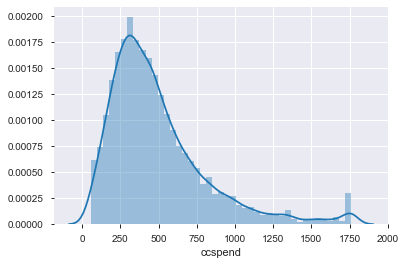

In [47]:
# Very first assumtion is that all the variables should be normally distributed, however that can't be possible
# However we have to be atleast strict about the dependant Y variable
import seaborn as sns
# Distribution of variables
sns.distplot(CC_data_new.ccspend)
plt.show()
# this distribution is highly skewed

# Notes:
#-----------------------------------------------------
# 1. if we get skewed data, then we have to transform the data and there are multiple methods to go about it
# 2. most commonly used and which works on most of the data is log transformation
# 3. Ideally we can do this for each of the dependant variable as well, 
#    however it will depend on amount of data and the amount of analytical rigour
# 4. In no case we can proceed if dependant variable is not normal/near to normal distributed

In [48]:
CC_data_new.ccspend.skew()

1.615173337243418

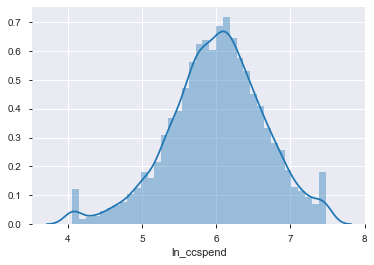

In [49]:
# Note: good practice is to take the log of the data plus 1, bcoz we don't have log of zero defined
# In thios data its not required as sales are always greater than zero

# apply log transformation: log is rescalling the data and making the distribution normal
CC_data_new['ln_ccspend'] = np.log(CC_data_new['ccspend'])

# Distribution of variables
sns.distplot(CC_data_new.ln_ccspend)
plt.show()

In [50]:
CC_data_new.ln_ccspend.skew()

-0.30005358806310334

## VARIBLE REDUCTION AND FEATURE SELECTION

In [51]:
#Based on the relationship Y & X
#if X is not having correlation with Y, drop these variable(corr(Y,X)<0.1, or transform these variables

In [55]:
corrw=CC_data_new.corrwith(CC_data_new.ln_ccspend)
corrw.to_excel('corrw_test.xlsx')
corrw

jobcat       -0.010592
union         0.021191
retire       -0.198252
default       0.018227
marital       0.018688
                ...   
wiremon       0.087177
wireten       0.097513
hourstv       0.044616
ccspend       0.909423
ln_ccspend    1.000000
Length: 136, dtype: float64

#list of X variables having linear relationship with Y

### F_Regression

In [56]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_oneway

In [57]:
CC_data_new.columns.difference(['ccspend', 'ln_ccspend'])

Index(['active', 'agecat_dummy_3', 'agecat_dummy_4', 'agecat_dummy_5',
       'agecat_dummy_6', 'bfast_dummy_2', 'bfast_dummy_3', 'callcard',
       'carbuy', 'carcatvalue_dummy_1',
       ...
       'spousedcat_dummy_5', 'tenure', 'townsize_dummy_2', 'townsize_dummy_3',
       'townsize_dummy_4', 'townsize_dummy_5', 'union', 'wireless', 'wiremon',
       'wireten'],
      dtype='object', length=134)

In [58]:
features = CC_data_new.columns.difference(['ccspend', 'ln_ccspend'])

In [59]:
X = CC_data_new[features]
Y= CC_data_new['ln_ccspend']

In [60]:
F_values, p_values  = f_regression(  X, Y )

In [61]:
f_reg_results = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)

In [62]:
f_reg_results.columns = ['Feature', 'F_Value', 'P_Value']

In [63]:
f_reg_results.sort_values('F_Value', ascending=False, inplace=True)

In [65]:
f_reg_results.to_excel('f_reg_results_test.xlsx')
f_reg_results

,Feature,F_Value,P_Value
95,lninc,979.942213,1.360998e-196
9,carcatvalue_dummy_1,436.617805,5.053000e-93
96,lnothdebt,405.411648,9.294081e-87
101,othdebt,363.647215,2.577434e-78
11,carcatvalue_dummy_3,362.711396,3.991635e-78
...,...,...,...
111,region_dummy_3,0.012331,9.115851e-01
41,cardtype_dummy_2,0.007057,9.330574e-01
43,cardtype_dummy_4,0.005342,9.417392e-01
42,cardtype_dummy_3,0.003710,9.514316e-01


### Recursive Feature Elimination (RFE)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
RFE_model = RFE(LinearRegression(), n_features_to_select=25)

In [68]:
RFE_model= RFE_model.fit(X, Y)

In [69]:
RFE_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,

In [70]:
RFE_selected_Cols = X.columns[list(RFE_model.get_support())]

In [71]:
RFE_model.ranking_

array([ 47,  40,  41,  83,  46,  21,  77,  35,  74,  26,   1,   1,   1,
         1,   1,   1,  76,   4,  62,  78,   1,  24,  42, 105,  50,  49,
        51,   1,   1,   1,   1,  63,  55,  96,  88, 100, 108,   1,  23,
        44,  43,  91, 102,  65,  27,  29,  13,  30,  59,  60,  28,  45,
         2,  57,  32,  20,  16,  19,  17,  18,  98, 106,  94,   1,  15,
        69,  37,   1,   1,  58,  53,  39,  71,  81, 101, 109,   1,  80,
        22,  38,  82,  68,   6,  61,  87,  70,  84,   1,   1,  52,  66,
        14,  73,   3,  67,   1,  93, 104, 110,  11,  36,  95,  86,  79,
         1,  90,   1,  33,   5,   1,  31,  48,  34,   1,  89,  56,  25,
         1,  64,  12,   8,   7,  10,   9,   1,  92,  97,  54,  85,  75,
        72,  99, 103, 107])

In [72]:
pd.Series(RFE_selected_Cols)

0        carcatvalue_dummy_2
1        carcatvalue_dummy_3
2              card2_dummy_2
3              card2_dummy_3
4              card2_dummy_4
5              card2_dummy_5
6     card2tenurecat_dummy_2
7               card_dummy_2
8               card_dummy_3
9               card_dummy_4
10              card_dummy_5
11     cardtenurecat_dummy_2
12                   default
13             edcat_dummy_4
14             edcat_dummy_5
15            gender_dummy_1
16          internet_dummy_3
17          internet_dummy_4
18                     lninc
19                     owntv
20            reason_dummy_2
21            reason_dummy_9
22            region_dummy_5
23               response_03
24        spousedcat_dummy_5
dtype: object

### SelectKBest

In [150]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [151]:
selectkbest = SelectKBest(f_classif, k=25)

In [152]:
selectkbest = selectkbest.fit(X,Y)

In [153]:
selectkbest.get_support()

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False,  True,

In [154]:
selectKbest_Cols = X.columns[list(selectkbest.get_support())]

In [155]:
pd.Series(selectKbest_Cols)

0        carcatvalue_dummy_1
1              card2_dummy_5
2       card2benefit_dummy_4
3     card2tenurecat_dummy_2
4               card_dummy_5
5        cardbenefit_dummy_2
6      cardtenurecat_dummy_2
7      cardtenurecat_dummy_4
8               cars_dummy_5
9               cars_dummy_7
10              cars_dummy_8
11        commutecat_dummy_2
12                   default
13            inccat_dummy_2
14            inccat_dummy_3
15            inccat_dummy_4
16          internet_dummy_2
17                lncreddebt
18                 lnothdebt
19            reason_dummy_2
20            reason_dummy_9
21               response_03
22        spousedcat_dummy_2
23        spousedcat_dummy_5
24          townsize_dummy_3
dtype: object

#### Reducing further list of variables using VIF (By remove multicollinierity)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [156]:
X_New = X[['carcatvalue_dummy_2','carcatvalue_dummy_3','card2_dummy_2','card2_dummy_3','card2_dummy_4','card2_dummy_5','card2tenurecat_dummy_2','card_dummy_2','card_dummy_3','card_dummy_4','card_dummy_5','cardtenurecat_dummy_2','default','edcat_dummy_4','edcat_dummy_5','gender_dummy_1','internet_dummy_3','internet_dummy_4','lninc','owntv','reason_dummy_2','reason_dummy_9','region_dummy_5','response_03','spousedcat_dummy_5','carcatvalue_dummy_1','retire','carown_dummy_0','lnothdebt','othdebt','lncreddebt','creddebt','inccat_dummy_5','inccat_dummy_4','carown_dummy_1','inccat_dummy_3','agecat_dummy_5','wireten','agecat_dummy_6','wiremon','equipten','cars_dummy_4','cars_dummy_5','cars_dummy_6','cars_dummy_7','cars_dummy_8','commutecat_dummy_2','commutecat_dummy_5','hometype_dummy_4','internet_dummy_2','reason_dummy_3','reason_dummy_4','response_01','response_02','spousedcat_dummy_1','spousedcat_dummy_3','spousedcat_dummy_4','card2benefit_dummy_4','cardbenefit_dummy_2','cardtenurecat_dummy_4','inccat_dummy_2','spousedcat_dummy_2','townsize_dummy_3']]

In [157]:
X_New = X_New[X_New.columns.difference([ 'carown_dummy_0','reason_dummy_9','othdebt','wiremon','owntv','lninc','carcatvalue_dummy_1','carcatvalue_dummy_2','carcatvalue_dummy_3','carown_dummy_1',])]

In [158]:
VIF = [variance_inflation_factor(X_New.values, i) for i in range(X_New.shape[1])]

In [159]:
VIF_results = pd.concat([pd.Series(X_New.columns), pd.Series(VIF)], axis=1)
VIF_results.columns = ['Feature', 'VIF']
VIF_results.sort_values('VIF', ascending=False, inplace=True)
VIF_results

,Feature,VIF
22,creddebt,4.725774
37,lnothdebt,3.209216
36,lncreddebt,3.151379
1,agecat_dummy_6,2.860360
29,inccat_dummy_2,2.709681
7,card2tenurecat_dummy_2,2.702769
45,retire,2.606373
13,cardtenurecat_dummy_2,2.593112
32,inccat_dummy_5,2.540434
31,inccat_dummy_4,2.410609


In [160]:
#Final list of columns to be included in the model
X_New.columns

Index(['agecat_dummy_5', 'agecat_dummy_6', 'card2_dummy_2', 'card2_dummy_3',
       'card2_dummy_4', 'card2_dummy_5', 'card2benefit_dummy_4',
       'card2tenurecat_dummy_2', 'card_dummy_2', 'card_dummy_3',
       'card_dummy_4', 'card_dummy_5', 'cardbenefit_dummy_2',
       'cardtenurecat_dummy_2', 'cardtenurecat_dummy_4', 'cars_dummy_4',
       'cars_dummy_5', 'cars_dummy_6', 'cars_dummy_7', 'cars_dummy_8',
       'commutecat_dummy_2', 'commutecat_dummy_5', 'creddebt', 'default',
       'edcat_dummy_4', 'edcat_dummy_5', 'equipten', 'gender_dummy_1',
       'hometype_dummy_4', 'inccat_dummy_2', 'inccat_dummy_3',
       'inccat_dummy_4', 'inccat_dummy_5', 'internet_dummy_2',
       'internet_dummy_3', 'internet_dummy_4', 'lncreddebt', 'lnothdebt',
       'reason_dummy_2', 'reason_dummy_3', 'reason_dummy_4', 'region_dummy_5',
       'response_01', 'response_02', 'response_03', 'retire',
       'spousedcat_dummy_1', 'spousedcat_dummy_2', 'spousedcat_dummy_3',
       'spousedcat_dummy_4',

### Split the data into train & test

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
data_new2 = pd.concat([X_New, Y], axis=1)

In [163]:
data_new2.head()

,agecat_dummy_5,agecat_dummy_6,card2_dummy_2,card2_dummy_3,card2_dummy_4,card2_dummy_5,card2benefit_dummy_4,card2tenurecat_dummy_2,card_dummy_2,card_dummy_3,...,response_03,retire,spousedcat_dummy_1,spousedcat_dummy_2,spousedcat_dummy_3,spousedcat_dummy_4,spousedcat_dummy_5,townsize_dummy_3,wireten,ln_ccspend
0,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0.00,5.007029
1,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1683.55,4.350794
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.00,5.886021
3,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,1,0.00,5.884464
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,410.80,6.230147


In [164]:
train, test = train_test_split(data_new2, test_size = 0.3, random_state =123)

### Model Building

In [165]:
import statsmodels.formula.api as smf

In [181]:
formula = 'ln_ccspend' + '~' + '+'.join(train.columns.difference(['ln_ccspend','spousedcat_dummy_2','cardtenurecat_dummy_4','card2benefit_dummy_4','townsize_dummy_3','cardbenefit_dummy_2','reason_dummy_4','lnothdebt','gender_dummy_1','region_dummy_5','response_02','spousedcat_dummy_4','response_01','reason_dummy_3','cars_dummy_5','internet_dummy_2','commutecat_dummy_2','commutecat_dummy_5','cars_dummy_4','cars_dummy_8','cars_dummy_7','cars_dummy_4','hometype_dummy_4','spousedcat_dummy_1','cars_dummy_6','spousedcat_dummy_3','wireten','internet_dummy_3','agecat_dummy_5','spousedcat_dummy_5','response_03','internet_dummy_4','edcat_dummy_4','edcat_dummy_5','equipten','default','agecat_dummy_6','creddebt','card2tenurecat_dummy_2','cardtenurecat_dummy_2']))

In [182]:
model = smf.ols(formula , data = train)
model = model.fit()

In [183]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_ccspend   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 05 May 2020   Prob (F-statistic):          2.39e-286
Time:                        08:48:02   Log-Likelihood:                -2797.5
No. Observations:                3500   AIC:                             5627.
Df Residuals:                    3484   BIC:                             5726.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.6054      0.041    160.

### Validation of Model

In [184]:
test_pred = np.exp(model.predict(test))
train_pred = np.exp(model.predict(train))

In [185]:
train_y = np.exp(train.ln_ccspend)
test_y = np.exp(test.ln_ccspend)

In [186]:
#Metrics for train data
MAPE_train = np.mean(np.abs(train_y - train_pred)/train_y)
print('Train_MAPE=', MAPE_train)
RMSE_train = np.sqrt(np.mean(np.square(train_y - train_pred)))
print('Train_RMSE=',RMSE_train)
RMSPE_train =np.sqrt(np.mean(np.square((train_y - train_pred)/train_y)))
print('Train_RMSPE=',RMSPE_train)
corr_train = np.corrcoef(train_y, train_pred)[1][0]
print('Train_Corr=',corr_train)

Train_MAPE= 0.4882407211225396
Train_RMSE= 271.57898108747855
Train_RMSPE= 0.7740915462329941
Train_Corr= 0.5840769335057828


In [187]:
#Metrics for test data
MAPE_test = np.mean(np.abs(test_y - test_pred)/test_y)
print('Test_MAPE=', MAPE_test)
RMSE_test = np.sqrt(np.mean(np.square(test_y - test_pred)))
print('Test_RMSE=',RMSE_test)
RMSPE_test =np.sqrt(np.mean(np.square((test_y - test_pred)/test_y)))
print('Test_RMSPE=',RMSPE_test)
corr_test = np.corrcoef(test_y, test_pred)[1][0]
print('Test_Corr=',corr_test)

Test_MAPE= 0.4473855859682524
Test_RMSE= 267.286665235854
Test_RMSPE= 0.6989791378405127
Test_Corr= 0.5597369569263794


## Drivers(positive and negative) for total spend

In [188]:
# top 15 drivers and their coefficient in linear regresssion equation
np.abs(model.params).sort_values(ascending=False)[1:16]

card_dummy_4      0.712175
inccat_dummy_5    0.661227
card_dummy_3      0.608134
card_dummy_2      0.581460
card_dummy_5      0.511270
inccat_dummy_4    0.450597
card2_dummy_4     0.428228
card2_dummy_2     0.391837
card2_dummy_3     0.369888
inccat_dummy_3    0.349211
card2_dummy_5     0.280194
reason_dummy_2    0.261713
inccat_dummy_2    0.176040
retire            0.163619
lncreddebt        0.032292
dtype: float64

In [189]:
# top 10 positive drivers and their coefficient in linear regresssion equation
model.params.sort_values(ascending=False)[1:11]

inccat_dummy_5    0.661227
inccat_dummy_4    0.450597
inccat_dummy_3    0.349211
reason_dummy_2    0.261713
inccat_dummy_2    0.176040
lncreddebt        0.032292
retire           -0.163619
card2_dummy_5    -0.280194
card2_dummy_3    -0.369888
card2_dummy_2    -0.391837
dtype: float64

In [191]:
# top 10 negative drivers and their coefficient in linear regresssion equation
model.params.sort_values(ascending=True)[0:10]


card_dummy_4    -0.712175
card_dummy_3    -0.608134
card_dummy_2    -0.581460
card_dummy_5    -0.511270
card2_dummy_4   -0.428228
card2_dummy_2   -0.391837
card2_dummy_3   -0.369888
card2_dummy_5   -0.280194
retire          -0.163619
lncreddebt       0.032292
dtype: float64

### Model Validtion using Decile Analysis

In [202]:
train_new=pd.concat([train_y,train_pred],axis= 1)
train_new.columns=['actual','predit']
test_new=pd.concat([test_y,test_pred],axis= 1)
test_new.columns=['actual','predit']

In [204]:
train_new['Decile']=pd.qcut(train_new.predit,10,labels=False)

In [205]:
train_new.groupby('Decile').mean()

,actual,predit
Decile,,
0,266.730656,227.905513
1,315.339816,273.009905
2,350.713766,302.470809
3,378.397194,330.041093
4,432.569593,363.642819
5,456.709314,403.388711
6,521.118449,451.942838
7,580.300256,516.832691
8,688.215912,608.307030


In [206]:
test_new['Decile']=pd.qcut(test_new.predit,10,labels=False)

In [207]:
test_new.groupby('Decile').mean()

,actual,predit
Decile,,
0,291.073421,234.283283
1,322.918168,278.020264
2,353.910400,307.685283
3,363.223901,336.218032
4,457.906600,376.273100
5,495.126016,414.379308
6,541.114816,465.755105
7,615.864915,537.568608
8,690.807632,620.197177


### Check assumptions of Linear Regression using erros (Bias, Residuals)

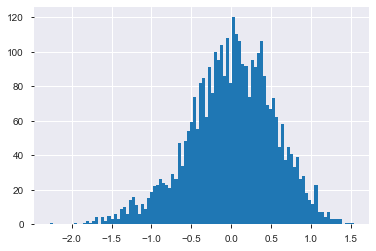

In [194]:
model.resid.hist(bins=100)

In [195]:
np.corrcoef(train_y,train_pred)

array([[1.        , 0.58407693],
       [0.58407693, 1.        ]])

In [196]:
np.corrcoef(train_y,model.resid)

array([[1.        , 0.70714572],
       [0.70714572, 1.        ]])

In [ ]:
# this is not a good modol since it shows the high correltions rather than a less correltions

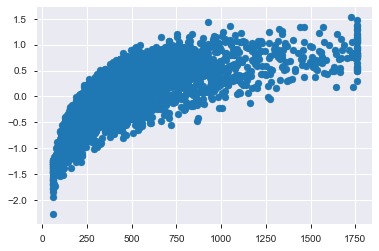

In [197]:
plt.scatter(train_y,model.resid)

## Residual Analysis

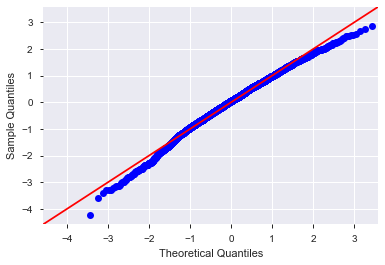

In [192]:
import statsmodels.api as sm
sm.qqplot(model.resid,fit=True,line='45')
plt.show()

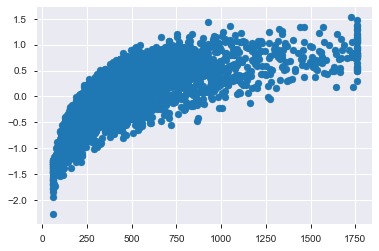

In [193]:
plt.scatter(train_y,model.resid)